In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import Adam

import fix_yahoo_finance as yf

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = yf.download('spy', start='2010-01-05')
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800
2010-01-11,115.080002,115.129997,114.239998,114.730003,93.385582,106375700


In [ ]:
data = df.Close.values
dim = data.shape[0]

X = np.arange(0,dim)
y = data 

SS =  MinMaxScaler() #StandardScaler()
y_normalized = SS.fit_transform(y.reshape(-1,1))

print(data.shape)

(2614,)


In [ ]:
# checkpoint_filepath = '/tmp/checkpoint' # model.load_weights(checkpoint_filepath)
# MC = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True,
#                       monitor='loss', mode='max', save_best_only=True)

In [ ]:
nodes = 100
ES = EarlyStopping(monitor='loss', patience=10, restore_best_weights= True)
model = Sequential()
model.add(Dense(nodes*5, 'elu')) # input_shape=(dim, )
model.add(Dense(nodes*3, 'elu'))
model.add(Dense(nodes*2, 'elu'))
model.add(Dense(nodes, 'elu'))
model.add(LayerNormalization())  # without loss: 118.0249
# model.add(BatchNormalization())


model.add(Dense(nodes, 'elu'))
model.add(Dense(100, 'elu'))
model.add(Dense(50, 'elu'))
model.add(Dense(25, 'elu'))


model.add(Dense(1))


opt = Adam(0.0005)
model.compile(optimizer=opt, loss ='mse') # mae
model.fit(X, y, batch_size= 50 , epochs= 200, callbacks= [ES])

Epoch 1/200
53/53 [==============================] - 0s 2ms/step - loss: 9073.8008
Epoch 2/200
53/53 [==============================] - 0s 2ms/step - loss: 1346.6206
Epoch 3/200
53/53 [==============================] - 0s 2ms/step - loss: 399.5984
Epoch 4/200
53/53 [==============================] - 0s 3ms/step - loss: 182.7088
Epoch 5/200
53/53 [==============================] - 0s 2ms/step - loss: 168.5588
Epoch 6/200
53/53 [==============================] - 0s 3ms/step - loss: 157.0473
Epoch 7/200
53/53 [==============================] - 0s 3ms/step - loss: 162.6995
Epoch 8/200
53/53 [==============================] - 0s 2ms/step - loss: 214.8428
Epoch 9/200
53/53 [==============================] - 0s 2ms/step - loss: 145.0332
Epoch 10/200
53/53 [==============================] - 0s 2ms/step - loss: 198.5941
Epoch 11/200
53/53 [==============================] - 0s 2ms/step - loss: 144.6401
Epoch 12/200
53/53 [==============================] - 0s 2ms/step - loss: 139.8018
Epoch 13/20

In [ ]:
y_hat = model.predict(X)

In [ ]:
print(y_hat.shape)
print(y_hat[:5])

(2615, 1)
[[112.53204 ]
 [116.24511 ]
 [115.108025]
 [113.77003 ]
 [112.63358 ]]


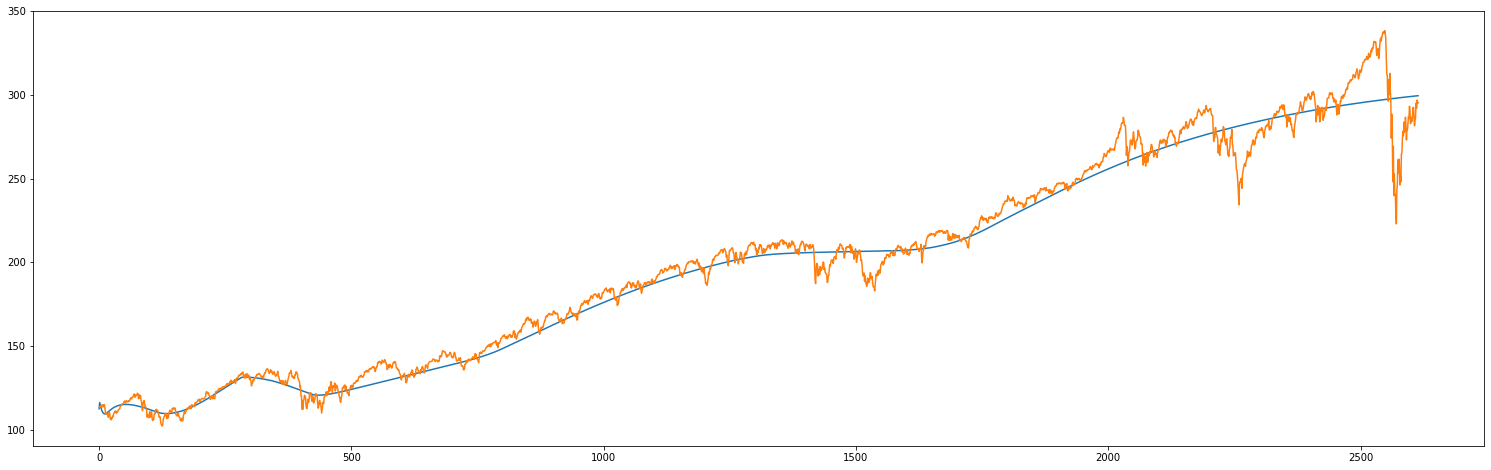

In [ ]:
plt.figure(figsize=(26,8))
plt.plot(y_hat)
plt.plot(y)

In [ ]:
X = np.arange(0,dim)
X = X[:1200].reshape(2614, 2, -1 )
X

ValueError: ignored

In [ ]:
nodes = 100
# ES = EarlyStopping(monitor='loss', patience=5, restore_best_weights= True)
model = Sequential()
model.add(TimeDistributed(Dense(500), input_shape=(dim, 1, ) ))
model.add(LSTM(500))
model.add(Dense(nodes, 'sigmoid')) 
model.add(Dense(nodes, 'sigmoid'))
model.add(Dense(nodes, 'sigmoid'))
model.add(Dense(nodes, 'sigmoid'))
model.add(LayerNormalization())
model.add(BatchNormalization())

model.add(Dense(nodes, 'sigmoid'))
model.add(Dense(nodes, 'sigmoid'))
model.add(Dense(nodes, 'sigmoid'))

# model.add(GaussianNoise(0.3))

model.add(Dense(nodes, 'sigmoid'))
model.add(Dense(nodes, 'sigmoid'))
model.add(Dense(nodes, 'sigmoid'))
model.add(LayerNormalization())
model.add(BatchNormalization())

model.add(Dense(nodes, 'sigmoid'))
model.add(Dense(nodes, 'sigmoid'))
model.add(Dense(nodes, 'sigmoid'))
model.add(Dense(nodes, 'sigmoid'))


model.add(Dense(1))


opt = Adam(0.0005)
model.compile(optimizer=opt, loss ='mse') # mae
model.fit(X, y_normalized, batch_size= 16, epochs= 10) #  callbacks= [ES]

ValueError: ignored

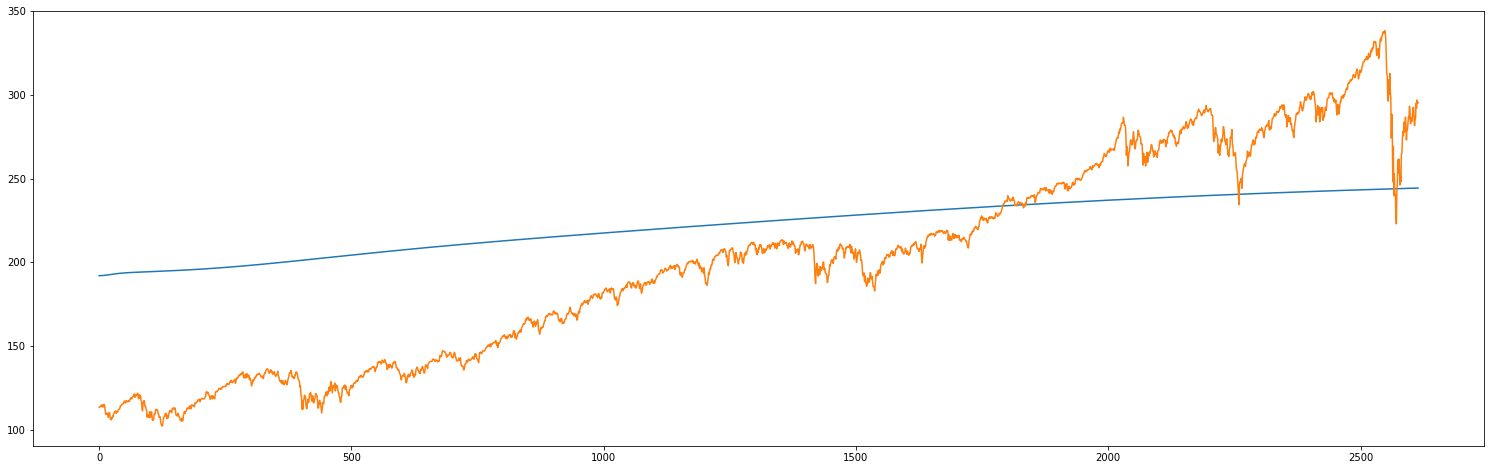

In [ ]:
y_hat = model.predict(X)

plt.figure(figsize=(26,8))
plt.plot(SS.inverse_transform(y_hat))
plt.plot(y)

In [ ]:
model.evaluate(X,y_normalized)

82/82 [==============================] - 0s 2ms/step - loss: 0.0462


0.0462176576256752

In [ ]:
y_normalized

array([[0.04713308],
       [0.04840349],
       [0.04874228],
       ...,
       [0.82463791],
       [0.81595667],
       [0.81832814]])

In [ ]:
SS.inverse_transform(y_hat)

array([[191.99522],
       [192.00471],
       [192.01582],
       ...,
       [244.32039],
       [244.32875],
       [244.33745]], dtype=float32)